In [1]:
import pandas as pd

df=pd.read_csv("C:/Users/Vedit/Downloads/titanic.csv")
df.shape
df.info()
df.describe()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
import matplotlib.pyplot as plt
import seaborn as sb

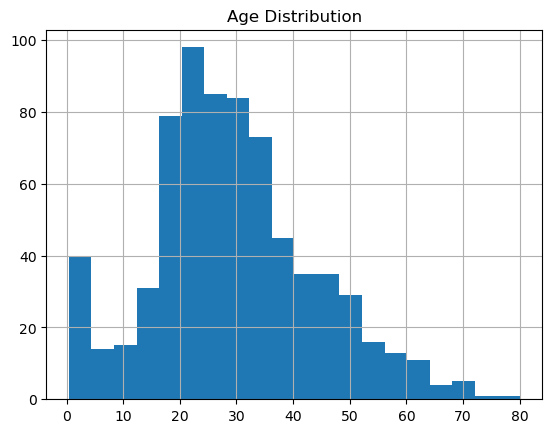

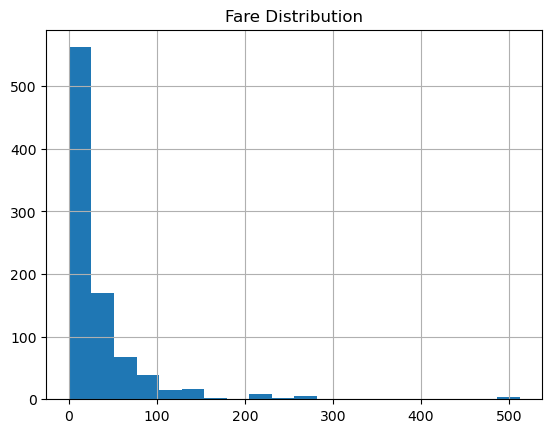

<Axes: xlabel='Sex', ylabel='count'>

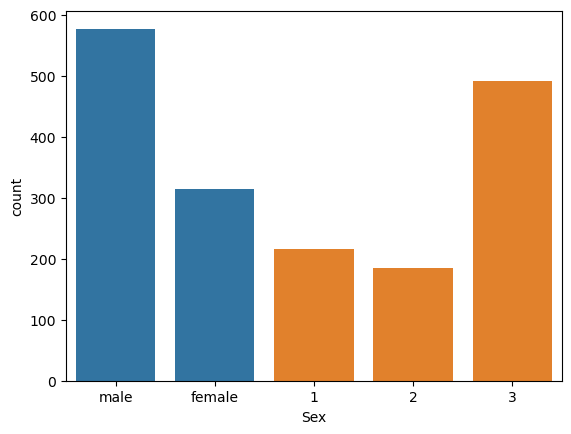

In [83]:
df["Age"].hist(bins=20)
plt.title("Age Distribution");
plt.show()

df["Fare"].hist(bins=20)
plt.title("Fare Distribution");
plt.show()

sb.countplot(data=df,x='Sex')
#plt.show()
sb.countplot(data=df,x='Pclass')

Most passengers were young to middle-aged, especially between 20–35 years and majorly males.

Distribution is roughly centered but has some spread across all age groups.

There are missing values in Age that will need to be handled.

Insight: Age will likely play a role in survival, especially when grouped (child, adult, senior).

In [85]:
df["Fare"].skew()

4.787316519674893

In [87]:
df[df['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [89]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Strong right-skew: Most passengers paid low fares who could be belonging to pclass 3.

25% paid ≤ $7.91

50% paid ≤ $14.45

75% paid ≤ $31

A few passengers paid over $500, which are extreme outlier 

Insight: Fare might correlate with class and survival — rich passengers (high fare) likely in 1st class.

Age is a continuous, centered variable with a wide range and a few nulls. It's a key demographic feature.

Fare shows high skewness and outliers, indicating economic class variation.

Both variables are good candidates for further comparison with Survived in forcomes

In [91]:
print(pd.crosstab(df['Sex'],df['Survived'],normalize='index'))

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


In [97]:
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [99]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [101]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [119]:
df['SurvivedStatus']=df['Survived'].map({0:'Died',1:'Survived'})

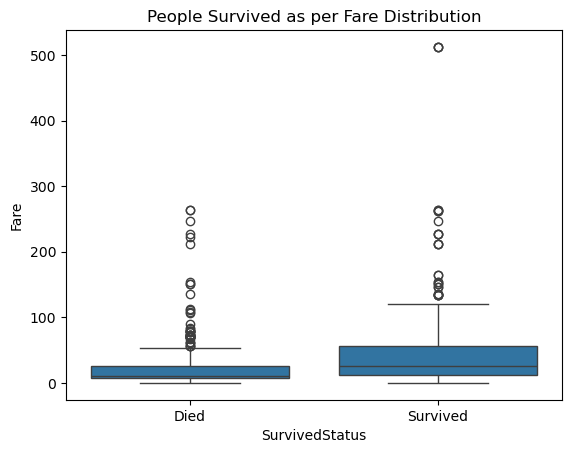

In [125]:
sb.boxplot(x='SurvivedStatus',y='Fare',data=df)
plt.title('People Survived as per Fare Distribution')
plt.show()

In [127]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
SurvivedStatus      0
dtype: int64

In [135]:
df['Age']=df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [137]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
SurvivedStatus      0
dtype: int64

In [143]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

C:\Users\Vedit\AppData\Local\Temp\ipykernel_18304\3717664479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)


In [145]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            0
SurvivedStatus      0
dtype: int64

In [160]:
df.drop(columns=['Cabin'],inplace=True)

In [162]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
SurvivedStatus    0
dtype: int64

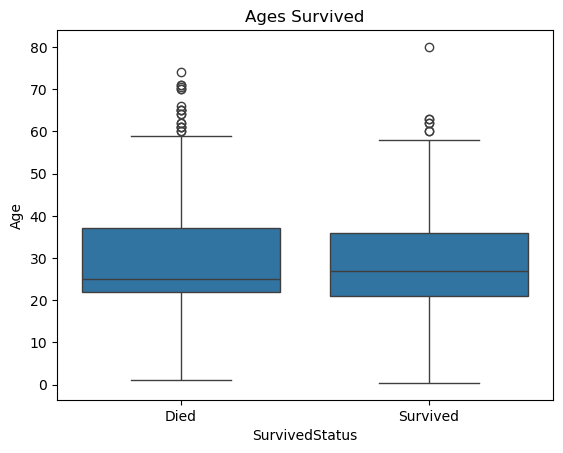

In [166]:
sb.boxplot(x='SurvivedStatus',y='Age',data=df)
plt.title("Ages Survived")
plt.show()

In [176]:
df['Sex']=df['Sex'].map({'male':0,'female':1})

In [178]:
df_encoded=pd.get_dummies(df, columns=['Embarked'],drop_first=True)

In [180]:
numeric_df=df_encoded.select_dtypes(include=['int64','float64'])

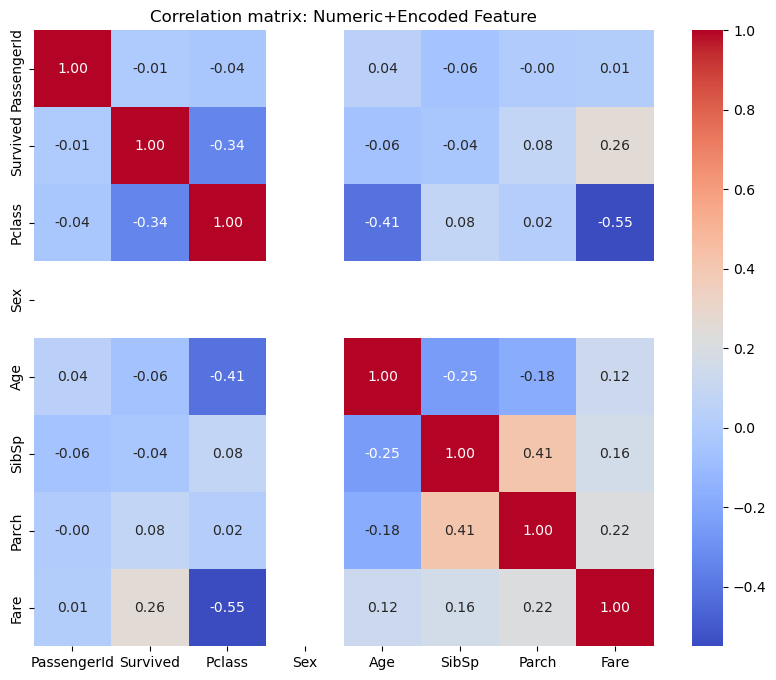

In [182]:
plt.figure(figsize=(10,8))
sb.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation matrix: Numeric+Encoded Feature")
plt.show()



Sex	~–0.41	Strong negative correlation → 0 = male, 1 = female → females more likely to survive
Pclass	~–0.34	Lower class number (1st class) more likely to survive
Fare	~+0.26	Higher-paying passengers more likely to survive
Age	~–0.06	Slight negative correlation → younger people survived slightly more
